## Rules of this Notebook:
### <span style = 'color:red'> Note: Read this time and again, as and when you feel like you have forgotten the rules</span> 

Note alse that this notebook has the three datasets `swipesmonth1719`, `years` and `bio`.

* Filter and join only using SQL commands (never Python), except when experimenting:

    1) Use `swipesmonth1719` and `years` tables ONLY for SQL queries
    
* Use python for anything else, but you may also use SQL for any other functionality

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Data

In [2]:
swipesmonth1719 = pd.read_csv(r'C:\Users\bseot\Documents\2019-MASTERS\MAIN\EDUCATION\DATA\WORKING\swipesmonth1719.csv')

In [3]:
years = pd.read_csv('C:/Users/bseot/Documents/2019-MASTERS/MAIN/EDUCATION/DATA/WORKING/years.csv')

C:\Users\bseot\Documents\2019-MASTERS\MAIN\EDUCATION\education1\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (17,18,19,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
bio = pd.read_csv(r'C:\Users\bseot\Documents\2019-MASTERS\MAIN\EDUCATION\DATA\WORKING\bio.csv')

C:\Users\bseot\Documents\2019-MASTERS\MAIN\EDUCATION\education1\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (49,51,52,94,103,104,105,112,113,114,115,116,120,122,124,134,135,136,137,138,139,167,179,183,187) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## SQL Imports

In [5]:
from pandasql import sqldf
from pandasql import *
pysqldf = lambda q: sqldf(q, globals())
pd.set_option('display.max_columns', 500)

## Pyramid only; not in residence

In [68]:
def filterSwipesBioYears(facility_type, year_icam, calendar_inst_year, residence_description):
    swipesBio = pysqldf(
        '''
        select 
            swipesmonth1719.user_id, swipesmonth1719.month_icam, swipesmonth1719.duration_minutes, 
            swipesmonth1719.no_of_days, swipesmonth1719.facility_type, bio.residence_description
        from swipesmonth1719
        left join bio on swipesmonth1719.user_id = bio.student_number
        where 
            swipesmonth1719.facility_type = '{}'
            and swipesmonth1719.year_icam = '{}'
            and bio.calendar_inst_year = '{}'
            and bio.residence_description <> '{}'
        '''.format(facility_type, year_icam, calendar_inst_year, residence_description)
               )
    return swipesBio


In [69]:
swipesBio17 = filterSwipesBioYears('Lib', 2017, 2017, 'Not In Residence')

In [8]:
swipes = pysqldf(
    '''
    SELECT * FROM swipesmonth1719
    '''

    )

In [9]:
year = pysqldf(
    '''
    SELECT * FROM years
    '''

    )

In [10]:
bi = pysqldf(
    '''
    SELECT * FROM bio
    '''

    )

In [118]:
swipesBioYears17 = pysqldf(
    '''
    select
    swipesBio17.user_id, swipesBio17.month_icam, swipesBio17.duration_minutes, 
    swipesBio17.no_of_days, swipesBio17.residence_description, years.unit_cd, years.unit_latest_mark
    from swipesBio17
    left join years 
    on swipesBio17.user_id = years.student_number
    where 
    years.unit_cd like 'COMS10%'
    

    '''    
                )
#    and years.unit_attempt_stat = 'ENROLLED' 
# and years.unit_latest_mark <> '0,000' 

#enrolled iggas only

In [119]:
swipesBioYears17coms_1 = swipesBioYears17.copy()

### Parse to numeric for `duration_minutes` and `unit_latest_mark`

In [120]:
# swipesmonthLib17['duration_minutes'] = swipesmonthLib17['duration_minutes'].str.replace(',', '.', regex = False)
# swipesmonthLib17['duration_minutes'] = pd.to_numeric(swipesmonthLib17['duration_minutes'])

In [121]:
# swipesmonthLib17 = swipesmonthLib17.fillna(0)

## Change strings to numbers in entire dataframe

In [122]:
for col in swipesBioYears17.columns:
    try:
        swipesBioYears17[col] = swipesBioYears17[col].str.replace(',', '.', regex = False)
        swipesBioYears17[col] = pd.to_numeric(swipesBioYears17[col])
    except:
        pass

In [123]:
swipesBioYears17 = swipesBioYears17.fillna(0)
swipesBioYears17.head(6)

,user_id,month_icam,duration_minutes,no_of_days,residence_description,unit_cd,unit_latest_mark
0,1144501,3,31.63,1,DAVID WEBSTER HALL,COMS1015,50.0
1,1144501,3,31.63,1,DAVID WEBSTER HALL,COMS1016,50.0
2,1144501,3,31.63,1,DAVID WEBSTER HALL,COMS1017,56.0
3,1144501,3,31.63,1,DAVID WEBSTER HALL,COMS1018,61.0
4,1144501,8,181.61,2,DAVID WEBSTER HALL,COMS1015,50.0
5,1144501,8,181.61,2,DAVID WEBSTER HALL,COMS1016,50.0


In [124]:
# a = swipesmonthLib17[swipesmonthLib17['residence_description'] != 'Not In Residence']
# a = swipesmonth1719.copy()

In [125]:
# fig = px.area(a, x="month_icam", y="duration_minutes", color="residence_description", line_group="user_id")
# fig.show()

### Attempted to make months in dataframe as columns

In [126]:
# def pivotDurationUnit():
#     userIds = swipesBioYears17['user_id'].unique() 
#     unitTitles =  swipesBioYears17['unit_title'].unique()    
#     cols =[]
#     for i in userIds:
#         user = swipesBioYears17[swipesBioYears17['user_id'] == i]
#         subjectMark = user.loc[:,['unit_title','unit_latest_mark']].values
# #         subjectMark = np.insert(subjectMark, 0, user.loc[:,['Duration', 'duration_minutes']].values)
#         residence = user['residence_description'].unique()[0]
#         subjectMark = np.insert(subjectMark, 0,['Residence',residence], axis = 0)
# # #         duration = user['duration_minutes'].unique().sum()
# # #         subjectMark = np.insert(subjectMark, 0,['Duration',duration], axis = 0)
# #         # insert user ids 
# #         subjectMark = np.insert(subjectMark, 0,['user_id',i], axis = 0)

# #         subjectMark = dict(subjectMark)
        
#         cols.append(subjectMark)
#     return subjectMark
# #     return userIds, months, unitTitles, cols 
    

### We want all data in 1 dataframe.

In [127]:
def pivotDurationUnit():
    userIds = swipesBioYears17['user_id'].unique() 
#     unitTitles =  swipesBioYears17['unit_title'].unique() 
    unitCds =  swipesBioYears17['unit_cd'].unique() 
    monthsSwipesBioYears17 = swipesBioYears17['month_icam'].unique()
    cols =[]
    for i in userIds:
        user = swipesBioYears17[swipesBioYears17['user_id'] == i]
        subjectMark = user.loc[:,['unit_cd','unit_latest_mark']].values

        userMonths = user['month_icam'].unique()
        userDurations = user['duration_minutes'].unique()
        subjectMark = np.insert(subjectMark, 0, list(zip(userMonths, userDurations)), axis = 0)
        
        days = user['no_of_days'].unique().sum()
        subjectMark = np.insert(subjectMark, 0,['Days',days], axis = 0)
#         duration = user['duration_minutes'].unique().sum()
#         subjectMark = np.insert(subjectMark, 0,['Duration',duration], axis = 0)

        residence = user['residence_description'].unique()[0]
        subjectMark = np.insert(subjectMark, 0,['Residence',residence], axis = 0)

        duration = user['duration_minutes'].unique().sum()
        subjectMark = np.insert(subjectMark, 0,['Duration',duration], axis = 0)
        # insert user ids 
        subjectMark = np.insert(subjectMark, 0,['user_id',i], axis = 0)
        subjectMark = dict(subjectMark)
        cols.append(subjectMark)
    return userIds, monthsSwipesBioYears17, unitCds, cols

### This has the duration summed, not separate like months

In [128]:
# def pivotDurationUni():
#     userIds = swipesBioYears17['user_id'].unique() 
#     unitTitles =  swipesBioYears17['unit_title'].unique()    
#     monthsSwipesBioYears17 = swipesBioYears17['month_icam'].unique()    
#     cols =[]
#     for i in userIds:
#         user = swipesBioYears17[swipesBioYears17['user_id'] == i]
#         subjectMark = user.loc[:,['unit_title','unit_latest_mark']].values
#         residence = user['residence_description'].unique()[0]
#         subjectMark = np.insert(subjectMark, 0,['Residence',residence], axis = 0)
#         duration = user['duration_minutes'].unique().sum()
#         subjectMark = np.insert(subjectMark, 0,['Duration',duration], axis = 0)
#         # insert user ids 
#         subjectMark = np.insert(subjectMark, 0,['user_id',i], axis = 0)

#         subjectMark = dict(subjectMark)
        
#         cols.append(subjectMark)
        
#     return userIds, monthsSwipesBioYears17, unitTitles, cols 
    

In [129]:
swipesmonthLib1702years = pivotDurationUnit()

In [82]:
# swipesmonthLab1702yearsMath3[2]
# [{'user_id': '870702',
#   'Duration': 7282.379999999999,
#   'Residence': 'JCT',
#   'Group Theory III': 45.0,
#   'Leontief Systems III': 61.0},
#  {'user_id': '795009',
#   'Duration': 1188.6,
#   'Residence': 'Not In Residence',
#   'Number Theory III': 55.0,
#   'Coding and Cryptography III': 72.0,
#   'Complex Analysis III': 60.0,
#   'Group Theory III': 46.0,
#   'Real Analysis III': 26.0,
#   'Leontief Systems III': 50.0},
#  {'user_id': '1425583',
#   'Duration': 5733.33,
#   'Residence': 'Not In Residence',
#   'Number Theory III': 78.0,
#   'Coding and Cryptography III': 63.0,
#   'Leontief Systems III': 60.0},

In [130]:
df = pd.DataFrame(index = swipesmonthLib1702years[0], data = swipesmonthLib1702years[3])
df = df.fillna(0)
df.head()

,user_id,Duration,Residence,Days,3,8,COMS1015,COMS1016,COMS1017,COMS1018,2,4,5,6,7,9,10,11,12
1144501,1144501,213.24,DAVID WEBSTER HALL,3,31.63,181.61,50.0,50.0,56.0,61.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
1332435,1332435,9053.72,MENS HALLS OF RESIDENCE,71,1255.69,1550.43,50.0,52.0,68.0,44.0,437.58,1541.13,998.79,396.57,116.30,969.11,874.36,913.76,0.0
1367978,1367978,3145.38,KNOCKANDO HALLS OF RESIDENCE,14,1533.49,153.28,70.0,56.0,70.0,65.0,163.32,1181.09,111.05,0.00,0.00,0.00,3.15,0.00,0.0
1597496,1597496,7330.00,KNOCKANDO HALLS OF RESIDENCE,55,1294.15,731.21,63.0,43.0,54.0,61.0,0.00,7.45,0.00,0.00,0.00,607.49,3013.60,1676.10,0.0
1174093,1174093,4128.33,BARNATO HALL,33,695.99,23.54,75.0,72.0,84.0,68.0,342.28,1560.62,309.61,44.72,90.78,326.05,328.19,406.55,0.0


### Useless

In [131]:

# dfValidMonthsData1 = pd.DataFrame(dfValidMonthsData.unstack().unstack().unstack())
# dfValidMonthsData1 = dfValidMonthsData1.rename(columns={0:'MonthDuration'})
# dfValidMonthsData1.head()
# dfValidMonthsData1['Month'] = dfValidMonthsData1.index.get_level_values(1)
# dfValidMonthsData1['StudentNumber'] = dfValidMonthsData1.index.get_level_values(0)
# df1 = pysqldf(
#     '''
#     SELECT *
#     FROM df
#     LEFT JOIN dfValidMonthsData1
#     ON df.user_id = dfValidMonthsData1.StudentNumber
#     '''
#     )
# validMonths1 = np.array(validMonths).astype(str)
# df2 = df1.loc[:, np.insert(validMonths1, 0, 'user_id', axis = 0)]
# df2 = df2.drop_duplicates()
# df2.index = df2.user_id

# df2 = df2.drop('user_id', axis = 1)


### Only get months, and rename the months to words

In [132]:
validMonths = [2,3,4,5,6,7,8,9,10,11,12]
dfValidMonthsData = df.loc[:,validMonths]
mapper1 = dict(zip(validMonths, ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']))
dfValidMonthsData = dfValidMonthsData.rename(columns = mapper1)

### Combine `dfValidMonthsData` and `df`, remove months that are numbers (repeated in `df`, not needed)

In [133]:
df_comb = pd.concat([dfValidMonthsData, df], axis = 1)
df_comb = df_comb.drop('user_id', axis = 1)
df_comb = df_comb.drop(validMonths, axis=1)

### Calculate duration per day 

In [134]:
df_comb['durationPDay'] = df_comb['Duration'] / df_comb['Days']

### Drop `residence` col

In [285]:
df_comb = df_comb.drop('Residence', axis = 1)

## Kmeans on MONTHLY activity.
We expect clusters on the monthly usage/pattern

In [87]:
df_comb_months = df_comb.loc[:,['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

In [88]:
import sklearn.preprocessing as skp
import sklearn.model_selection as skm
X = skp.StandardScaler().fit_transform(df_comb_months)
X = np.nan_to_num(X, copy = True)

In [89]:
from sklearn.cluster import KMeans
from sklearn import cluster
n_clusters = 2
np.random.seed(97)
k_means = cluster.KMeans(n_clusters=n_clusters, n_init=4)
# The original X will still have the nan
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=4, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [90]:
df_comb['kMeansLabels'] = k_means.labels_
df_comb.groupby('kMeansLabels').kMeansLabels.count()

kMeansLabels
0    363
1     37
Name: kMeansLabels, dtype: int64

In [91]:
import plotly.express as px
colorscale=[[0, "rgb(166,206,227)"],
            [0.25, "rgb(31,120,180)"],
            [0.45, "rgb(178,223,138)"],
            [0.65, "rgb(51,160,44)"],
            [0.85, "rgb(251,154,153)"],
            [1, "rgb(227,26,28)"]]
px.scatter(data_frame=df_comb, x = 'Duration', y = 'MATH1010', color='kMeansLabels', color_continuous_scale=colorscale)

## Kmeans on no. of DAYS only.
We expect clusters on the monthly usage/pattern

In [92]:
import sklearn.preprocessing as skp
import sklearn.model_selection as skm
X = skp.StandardScaler().fit_transform(np.array(df['Days']).reshape(-1, 1))
X = np.nan_to_num(X, copy = True)

In [98]:
from sklearn.cluster import KMeans
from sklearn import cluster
n_clusters = 3
np.random.seed(97)
k_means = cluster.KMeans(n_clusters=n_clusters, n_init=4)
# The original X will still have the nan
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=4, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [99]:
df_comb['kMeansLabels'] = k_means.labels_
df_comb.groupby('kMeansLabels').kMeansLabels.count()

kMeansLabels
0    255
1     29
2    116
Name: kMeansLabels, dtype: int64

In [100]:
sns.scatterplot(data = df_comb.iloc[:, 12:-1])

ValueError: A wide-form input must have only numeric values.

In [108]:
import plotly.express as px
colorscale=[[0, "rgb(166,206,227)"],
            [0.25, "rgb(31,120,180)"],
            [0.45, "rgb(178,223,138)"],
            [0.65, "rgb(51,160,44)"],
            [0.85, "rgb(251,154,153)"],
            [1, "rgb(227,26,28)"]]
px.scatter(data_frame=df_comb, x = 'Duration', y = 'MATH1036', color='kMeansLabels', color_continuous_scale=colorscale)

In [104]:
fig = px.violin(df_comb, y="MATH1010", x=None, color="kMeansLabels", box=True, points="all", hover_data = None, violinmode='group')
fig.show()

## Kmeans on MONTHLY activity and DAYS.
We expect clusters on the monthly usage/pattern

In [135]:
df_comb_months = df_comb.loc[:,['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

In [136]:
import sklearn.preprocessing as skp
import sklearn.model_selection as skm
X = skp.StandardScaler().fit_transform(df_comb_months)
X = np.nan_to_num(X, copy = True)

In [137]:
from sklearn.cluster import KMeans
from sklearn import cluster
n_clusters = 2
np.random.seed(97)
k_means = cluster.KMeans(n_clusters=n_clusters, n_init=4)
# The original X will still have the nan
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=4, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [138]:
df_comb['kMeansLabels'] = k_means.labels_
df_comb.groupby('kMeansLabels').kMeansLabels.count()

kMeansLabels
0    78
1     6
Name: kMeansLabels, dtype: int64

In [140]:
import plotly.express as px
colorscale=[[0, "rgb(166,206,227)"],
            [0.25, "rgb(31,120,180)"],
            [0.45, "rgb(178,223,138)"],
            [0.65, "rgb(51,160,44)"],
            [0.85, "rgb(251,154,153)"],
            [1, "rgb(227,26,28)"]]
px.scatter(data_frame=df_comb, x = 'Duration', y = 'MATH1010', color='kMeansLabels', color_continuous_scale=colorscale)

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Duration', 'Residence', 'Days', 'COMS1015', 'COMS1016', 'COMS1017', 'COMS1018', 'durationPDay', 'kMeansLabels'] but received: MATH1010

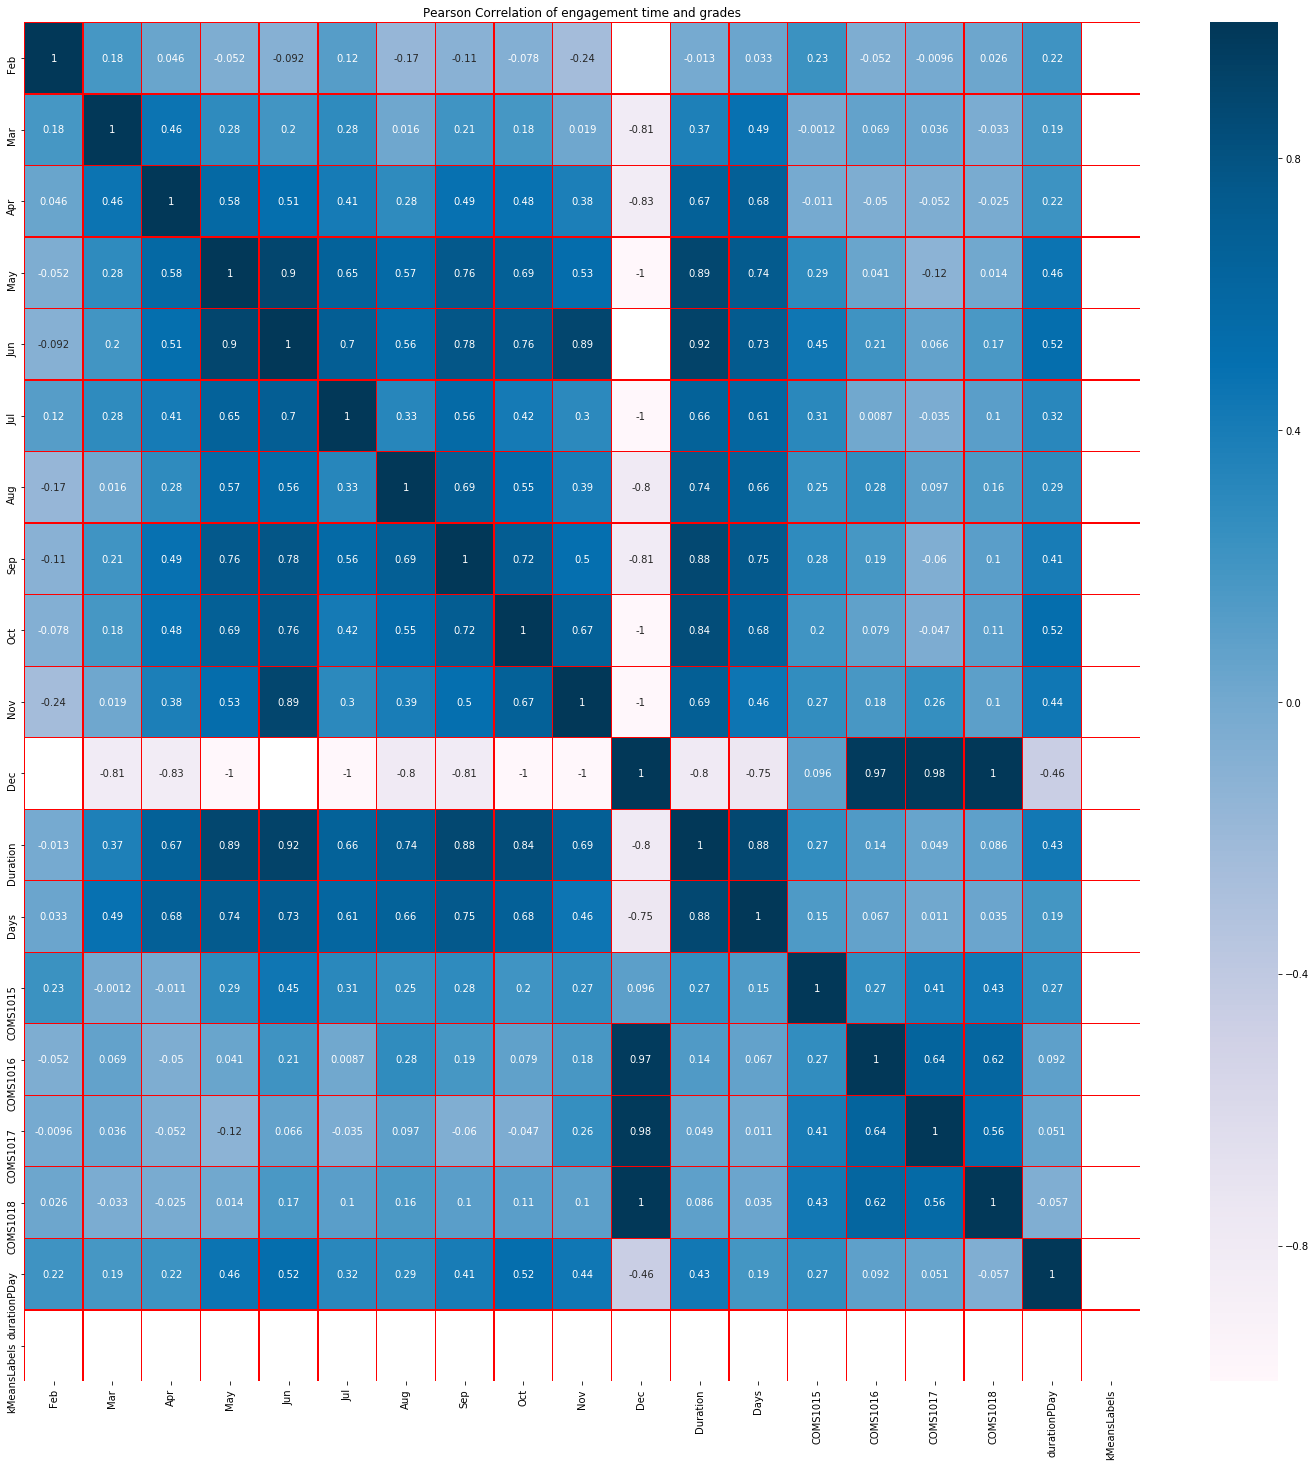

In [141]:
f, ax1 = plt.subplots(figsize=(25, 25))

plt.title('Pearson Correlation of engagement time and grades')

sns.heatmap(df_comb.replace({0:np.nan}).corr(method = 'pearson'),linewidths=0.3,vmax=1.0, square=False, cmap = 'PuBu', linecolor='red', annot=True, ax = ax1)

plt.show()

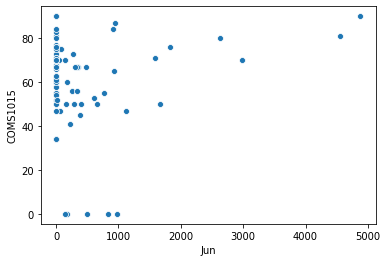

In [142]:
sns.scatterplot(x='Jun', y='COMS1015',data=df_comb.loc[:,['Jun', 'COMS1015']])

In [39]:
df_comb

,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Duration,Residence,Days,COMS1015,COMS1016,COMS1017,COMS1018,COMS1000,COMS1015A,COMS1016A,COMS1017A,COMS1018A,kMeansLabels
736277,565.07,6409.29,4450.48,2935.25,2252.49,1891.18,6948.63,2781.46,7014.37,2691.69,0.00,37939.91,Not In Residence,147,70.0,68.0,88.0,65.0,0.0,0.0,0.0,0.0,0.0,1
858885,424.90,2708.16,1490.70,1504.47,708.54,274.08,4032.32,1512.67,3121.81,819.60,0.00,16597.25,Not In Residence,82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1090294,1104.57,8107.13,7889.58,5521.74,3621.20,8055.09,7011.76,4330.41,4690.78,5607.72,0.00,55939.98,Not In Residence,182,65.0,81.0,81.0,80.0,0.0,0.0,0.0,0.0,0.0,0
1386608,0.00,4248.67,1306.86,1365.85,225.74,2028.10,3567.46,2276.17,1248.10,1711.03,0.00,17977.98,Not In Residence,86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1375858,1552.69,7825.07,6700.69,9517.14,2989.27,3504.57,11503.03,7084.40,8840.38,4768.72,0.00,64285.96,Not In Residence,139,85.0,41.0,75.0,84.0,0.0,0.0,0.0,0.0,0.0,0
1073978,969.37,2926.33,4089.29,3141.79,1614.67,617.23,2440.18,373.58,331.57,701.02,0.00,17205.03,Not In Residence,91,90.0,51.0,73.0,66.0,0.0,0.0,0.0,0.0,0.0,1
1405735,0.00,0.00,0.00,0.00,0.00,119.80,65.43,29.33,0.00,0.00,0.00,214.56,Not In Residence,3,77.0,75.0,70.0,81.0,0.0,0.0,0.0,0.0,0.0,1
1425583,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Not In Residence,1,71.0,75.0,76.0,84.0,0.0,0.0,0.0,0.0,0.0,1
805494,774.66,3567.69,5083.69,5065.97,2205.94,1071.38,4119.96,2471.24,2925.40,2408.65,692.69,30387.27,Not In Residence,99,77.0,75.0,87.0,64.0,0.0,0.0,0.0,0.0,0.0,1
1127461,454.67,2802.11,1340.91,2176.25,1980.16,2608.74,1026.02,721.68,1936.56,3032.04,503.05,18582.19,Not In Residence,100,65.0,63.0,85.0,67.0,0.0,0.0,0.0,0.0,0.0,1


In [303]:
df_comb.loc[:,['Duration', 'COMS1015']]

,Duration,COMS1015
736277,1010.34,70.0
858885,23.10,0.0
1090294,45.62,65.0
1386608,13423.97,0.0
1375858,5180.24,85.0
1073978,6989.23,90.0
1405735,262.46,77.0
1332435,4013.69,50.0
1367978,2843.93,70.0
1425583,303.65,71.0


In [214]:
import plotly.express as px

px.scatter(data_frame = df_comb.iloc[:, 11:], x = ['COMS1015', 'COMS1016', 'COMS1017', 'COMS1018', 'COMS1015A', 'COMS1016A', 'COMS1017A', 'COMS1018A', 'COMS1000'])

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Duration', 'COMS1015', 'COMS1016', 'COMS1017', 'COMS1018', 'COMS1015A', 'COMS1016A', 'COMS1017A', 'COMS1018A', 'COMS1000', 'kMeansLabels'] but received: ['COMS1015', 'COMS1016', 'COMS1017', 'COMS1018', 'COMS1015A', 'COMS1016A', 'COMS1017A', 'COMS1018A', 'COMS1000']

In [66]:
# fig?
px?

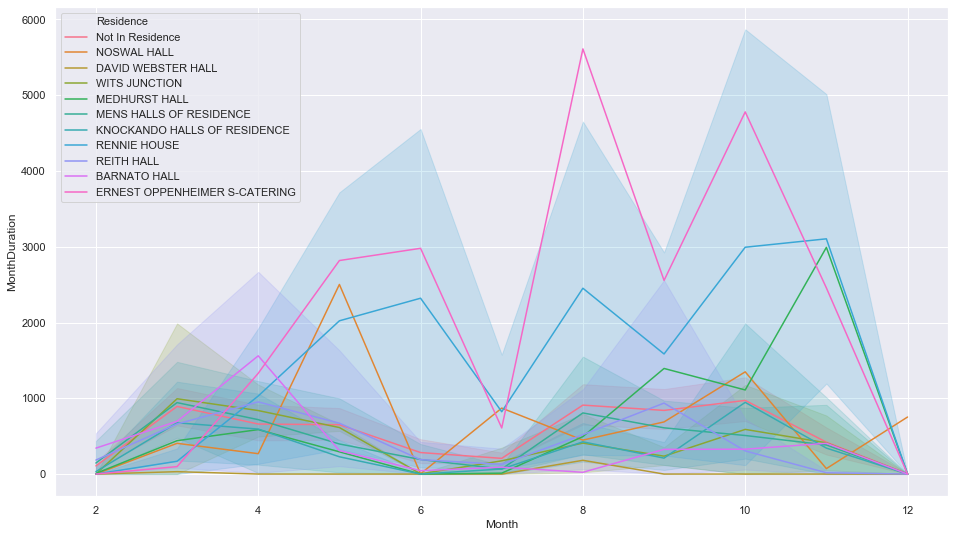

In [67]:
sns.set();
fig, ax = plt.subplots(figsize = (16,9))

# Adding hue to the parameters separates the line(s) by hue group
sns.lineplot(ax = ax, data = df1.iloc[:1000,:], x="Month", y="MonthDuration", hue='Residence')

### When plotting, x must be a column name, y must be a column name. the data in the columns will be populated. We are doing this because we wanted all data in 1 dataframe.

In [99]:
import plotly.express as px
fig = px.line(data_frame = a, x="month_icam", y="duration_minutes", color="Residence", 
            line_group=None, hover_name='user_id',
            line_shape="spline", render_mode="svg")
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] but received: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [22]:
# fig = px.area(a, x="month_icam", y="duration_minutes", color="residence_description", line_group="user_id")
# fig.show()

In [41]:
tmp = a.groupby('residence_description').mean()
tmp['ResidenceDescription'] = tmp.index
tmp = tmp.sort_values(by = 'duration_minutes', ascending = False)

KeyError: 'residence_description'

In [39]:
fig = px.bar(tmp, x = 'ResidenceDescription', y = 'duration_minutes')
fig.show()

### Scale and fill NaN's with 0's cause that's most intuitive - NaN indicates 0 number of minutes or days

In [90]:
import sklearn.preprocessing as skp
import sklearn.model_selection as skm
X = skp.StandardScaler().fit_transform(swipesmonth1702)

X = np.nan_to_num(X, copy = True)

## Kmeans on `duration`

In [91]:
from sklearn.cluster import KMeans
from sklearn import cluster
n_clusters = 5
np.random.seed(97)
k_means = cluster.KMeans(n_clusters=n_clusters, n_init=4)
# The original X will still have the nan
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=4, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Remember, `swipesmonth1702` is not scaled

In [92]:
XLabels = k_means.labels_
swipesmonth1702['kMeansLabels'] = XLabels

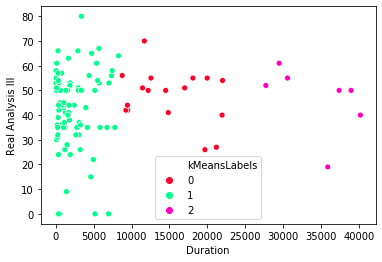

In [102]:
sns.scatterplot(data = swipesmonth1702, x = 'duration_minutes', y = 'no_of_days', hue = 'kMeansLabels', palette = 'gist_rainbow')

## Kmeans for duration only

In [103]:
from sklearn.cluster import KMeans
from sklearn import cluster
n_clusters = 3
np.random.seed(97)
k_means = cluster.KMeans(n_clusters=n_clusters, n_init=4)
# The original X will still have the nan
X1 = np.array(a['Duration']).reshape(-1,1)
k_means.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=4, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [104]:
X1Labels = k_means.labels_
a['kMeansLabels'] = X1Labels

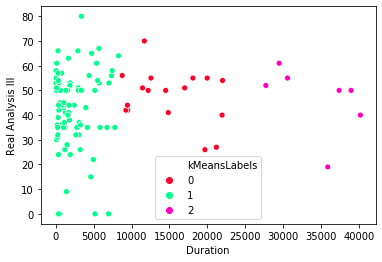

In [105]:
sns.scatterplot(data = a, x = 'Duration', y = 'Real Analysis III', hue = 'kMeansLabels', palette = 'gist_rainbow')

### Scatterplot for marks vs duration coloured by residence

In [164]:
a

,Duration,Residence,Group Theory III,Leontief Systems III,Number Theory III,Coding and Cryptography III,Complex Analysis III,Real Analysis III,Rings and Fields III,Differential Geometry III,Topology III
870702,7282.38,JCT,45.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795009,1188.60,Not In Residence,46.0,50.0,55.0,72.0,60.0,26.0,NaN,NaN,NaN
1425583,5733.33,Not In Residence,NaN,60.0,78.0,63.0,NaN,NaN,NaN,NaN,NaN
835527,2429.28,REN,61.0,65.0,61.0,76.0,80.0,44.0,NaN,NaN,NaN
1126582,18092.29,REI,78.0,70.0,78.0,80.0,80.0,55.0,NaN,NaN,NaN
805616,1259.59,JCT,67.0,NaN,53.0,NaN,41.0,41.0,33.0,23.0,NaN
1084380,14839.63,Not In Residence,76.0,75.0,64.0,80.0,80.0,41.0,NaN,NaN,NaN
1174093,4128.33,BAR,53.0,54.0,NaN,61.0,66.0,NaN,NaN,NaN,NaN
867062,30574.08,REN,72.0,64.0,61.0,72.0,73.0,55.0,45.0,NaN,NaN
1038238,999.15,Not In Residence,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,NaN


In [24]:
a

,user_id,Duration,Residence,APES Hons Special Topic,Biocontrol,Biosystematics and Evolution III,Climate Change - Exploring Science with Society,Diversity. Ecology and Economic Importance of Algae,Enabling Skills,Functional Ecology in Changing Environments III,Research Project: Animal. Plant and Environmental Sciences,Sustainability in Environmental Sciences,Algebra I,Biochemistry and Cell Biology III,Calculus I,Computational and Applied Mathematics I,Computational and Applied Mathematics II,Cosmology: The Origin and Evolution of the Universe II,Drug Discovery II,Genetic Innovations II,Genetics and Developmental Biology III,Introduction to Astronomy I,Introduction to Mathematical Statistics II,Linear Algebra II,Modern Astrophysics I,Molecular Basis of Disease II,Molecular and Cell Biology IIA: Scientific Practice,Molecular and Cell Biology IIB: Concepts,Multivariable Calculus II,Physics I (Major),Physics IIA (Major),Physics IIB (Major),Abstract Mathematics II,Analysis of Algorithms II,Basic Analysis II,Basic Computer Organisation I,Computer Networks II,Database Fundamentals II,Differential Equations II,Discrete Computational Structures I,Introduction to Algorithms and Programming I,Introduction to Data Structures and Algorithms I,Introductory Analysis II,Mathematical Statistics I (HC),Mathematics II,Mobile Computing,Operating Systems,Programming Languages,Actuarial Science I (HC),Ancillary Mathematics and Statistics I,Chemistry I,Complementary Life Sciences I,Computational and Applied Mathematics III,Introductory Life Sciences,Actuarial Science II,Actuarial Science III,Advanced Analysis II,Mathematical Statistics II,Mathematical Statistics III,Multivariable Calculus,An Introduction to Climate and Society II,Applied Population Ecology III,Aquatic Ecology II,Behavioural Ecology III,Biogeography,Biotic Diversity II,Conservation Biogeography II,Earth and Atmospheric Processes II,Economic Geography III,Environmental Monitoring and Modelling III,Evolution II,Experimental Field Biology III,Fundamentals of Ecology II,Geographic Information Systems and Remote Sensing III,Geography I,Geology I,Methods. Models and Geographic Information Systems II,People and Conservation Field Course III,Physiological Entomology,Plant Propagation and Conservation III,Theory and Practice in Sustainability Science and Sustainable Development III,Whole Plant Physiology II,Basic Nuclear Physics II,Chemistry IA,Introduction to Reactor Physics II,Mechanics,Archaeology I,Archaeology II,Archaeology III,Geology II,Geology III,Mapwork for Geologists,Practical Geological Mapping Techniques III,Applied Chemistry II,Applied Chemistry IIIA,Applied Chemistry IIIB,Chemistry IIA (Major),Chemistry IIB (Major),Chemistry IIIA (Major),Chemistry IIIB (Major),Animal Form and Function II,Introduction to Animal Behaviour II,Physics I (Auxiliary),Reproductive Biology II,Software Design III,Ancillary Statistics I,Microbiology and Biotechnology III,Molecular and Cell Biology IIC: Applications,Auxiliary Mathematics I,Advanced Analysis of Algorithms III,Advanced Experimental Physics and Project,Computer Graphics and Visualisation III,Formal Languages and Automata,Machine Learning III,Parallel Computing III,Quantum Mechanics III,Quantum Mechanics and its Applications III,Statistical Physics III,Waves and Modern Optics,Complementary Earth Science II,Energy Resources,Exploration and Environmental Geochemistry,Exploration and Mining Geosciences III,Exploration. Mining and Mineral Economics,Geophysics for Geologists,Hydrogeology,Igneous Petrology,Information Systems in Earth Science,Introduction to Geochemistry,Introduction to Hydrogeology III,Mineralisation Processes,Research Project: Geology,Sedimentary Basin Analysis,Statistics for Earth Scientists,Structural Geology,Tectonics of Africa,Chemistry I (Auxiliary) (Engineering),Group Theory III,Leontief Systems III,Mathematics I (Engineering),Physics I,Basic Statistics for the Natural Sciences II,Basic Statistics for the Natural Sciences II

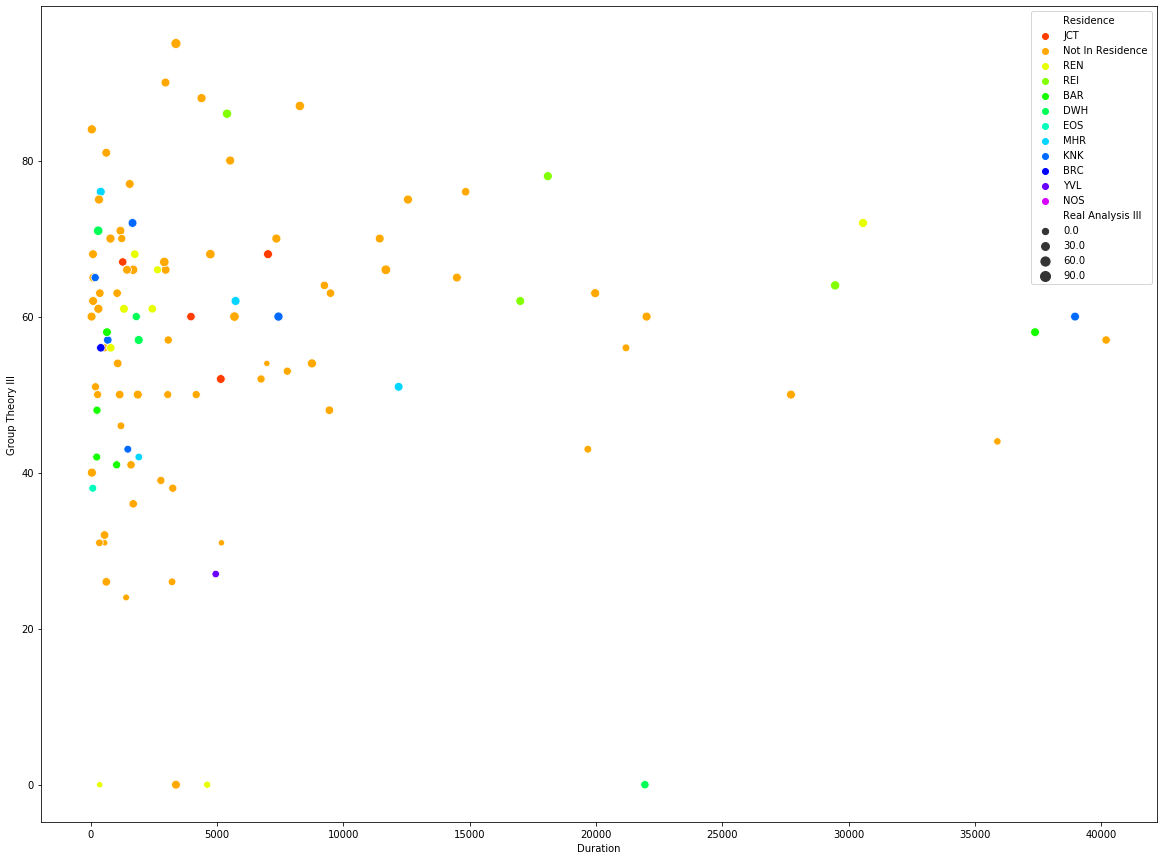

In [176]:
fig, ax = plt.subplots(figsize = (20,15))
sns.scatterplot(data = a, x = 'Duration', y = 'Group Theory III', size = 'Real Analysis III', sizes = (40,100), hue = 'Residence', hue_order = None, palette='gist_rainbow')

### Pandas Profiling bio

In [5]:
import pandas_profiling

In [ ]:
pf_bio = pandas_profiling.ProfileReport(bio)

In [ ]:
pf_bio.to_file(output_file="bio.html")

### Pandas Profiling swipesmonth1719

In [ ]:
pf_swipesmonth1719 = pandas_profiling.ProfileReport(swipesmonth1719)

In [60]:
pf_swipesmonth1719.to_file(output_file="swipesMonth1719.html")

### Pandas Profiling years

In [62]:
pf_years = pandas_profiling.ProfileReport(years)

In [63]:
pf_years.to_file(output_file="years.html")